<a href="https://colab.research.google.com/github/AlanEdward19/ProcessamentoDeImagens/blob/main/exPDI04_transformacoes_tin3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6"><center>Centro Universitário Facens</center></font><br/>

<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Dr. Renato Moraes Silva</center></font>
<br/>
<br/>

# Transformações geométricas

Neste notebook, iremos fazer algumas operações envolvendo transformações geométricas.

Primeiro, iremos importar as principais bibliotecas.

In [4]:
import numpy as np
import cv2
import os
import urllib.request
import matplotlib.pyplot as plt

Para testar esse método, crie uma imagem quadriculada em tons de cinza usando operações matriciais: imagem preta com listras horizontais e verticais brancas. Depois, adicione o nome "Facens" nessa imagens.

É possível também inserir texto nas imagens usando a função **putText** que possui os seguintes parâmetros:
- **img**: imagem
- **text**: texto desejado
- **org**: coordenadas no formato (x,y) onde o texto deve ser inserido
- **fontFace**: o tipo de fonte. Exemplos: FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, FONT_HERSHEY_DUPLEX, etc
- **fontScale**: inteiro que indica a escala da fonte e é usado para aumentar ou diminuir a fonte
- **color**: cor no formato BGR
- **thickness** (opcional): espessura das linha
- **lineType** (opcional): tipo de linha. Opções: FILLED, LINE_4, LINE_8, LINE_AA
- **bottomLeftOrigin** (opcional): o valor False mantém o texto normal, enquanto que o True, inverte o texto

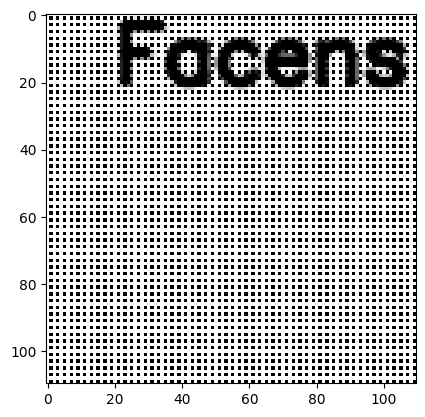

In [5]:
img = np.zeros([110,110], dtype=np.uint8)

################# COMPLETE O CÓDIGO AQUI  #################

for i in range( 0, img.shape[0], 2 ):
  img[i,:] = 255

for i in range( 0, img.shape[1], 2 ):
  img[:,i] = 255

##########################################################

img = cv2.putText(img,text = "Facens", org = (20,20), fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                  fontScale = 0.8, color = [0,0,0], thickness = 2, lineType = cv2.LINE_AA)

# plota a imagem vermelha
plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.show()

## Escalamento

Para o escalamento, podemos usar a função **resize** que recebe os seguintes argumentos:
- src: a imagem
- dsize: tamanho desejado da nova imagem. Exemplo: (2,3), onde 2 é a largura e 3 é a altura
- fx: fator de escala em relação ao eixo horizontal
- fy: fator de escala em relação ao eixo vertical
- interpolation: método de interpolação
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica
     
Se você tentar redimensionar usando escala, defina o parâmetro **dsize** como nulo.

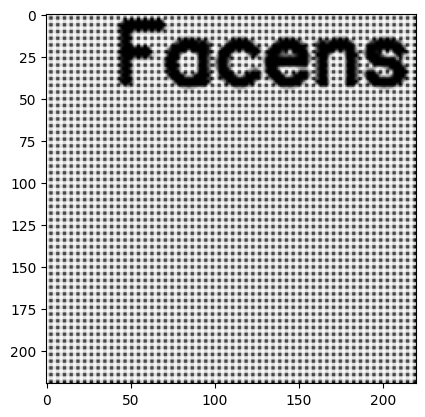

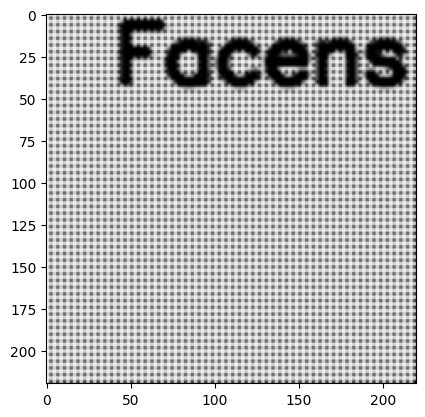

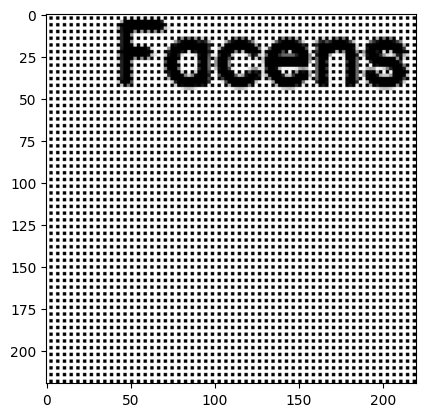

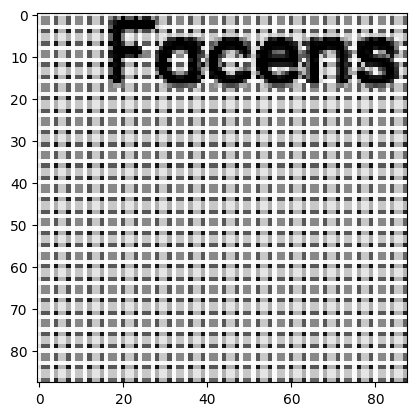

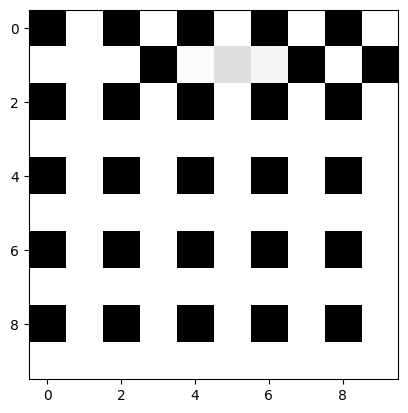

In [11]:
################# COMPLETE O CÓDIGO AQUI  #################

img2 = cv2.resize(img,
                  dsize = None,
                  fx = 2, fy = 2,
                  interpolation = cv2.INTER_CUBIC)

img3 = cv2.resize(img,
                  dsize = None,
                  fx = 2, fy = 2,
                  interpolation = cv2.INTER_LINEAR)

img4 = cv2.resize(img,
                  dsize = None,
                  fx = 2, fy = 2,
                  interpolation = cv2.INTER_NEAREST)

img5 = cv2.resize(img,
                  dsize = None,
                  fx = 0.8, fy = 0.8,
                  interpolation = cv2.INTER_CUBIC)

img6 = cv2.resize(img,
                  dsize = (10,10),
                  fx = 0.8, fy = 0.8,
                  interpolation = cv2.INTER_CUBIC)


##########################################################

plt.imshow(img2, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img3, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img4, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img5, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img6, 'gray', vmin=0, vmax=255)
plt.show()

As operações de escala, rotação, translação ou cisalhamento também podem ser feitas usando transformação afim.

Para usar a transformação afim, use a função **warpAffine** da OpenCV. Por exemplo, a operação afim para escalamento é:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = %
%
\begin{bmatrix}
1/S_x & 0 & 0\\
0 & 1/S_y & 0\\
0 & 0 & 1
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} %
$$

No entanto, na biblioteca OpenCV você deve usar a matriz apresentada abaixo, pois ela usa por padrão a **transformação afim direta**:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = %
%
\begin{bmatrix}
S_x & 0 & 0\\
0 & S_y & 0\\
0 & 0 & 1
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} %
$$

Se você quiser descobrir a matriz afim de uma **transformação afim inversa** a partir da matriz da **transformação afim direta**, você precisa calcular a **matriz inversa** da **transformação afim direta**. A mesma lógica deve ser seguida se você quiser descobrir a matriz afim de uma **transformação afim direta** a partir da matriz da **transformação afim inversa**. No python, a inversa de uma matriz $m$ pode ser calculada por ``np.linalg.inv(m)``



In [13]:
################# COMPLETE O CÓDIGO AQUI  #################

sx = 2
sy = 0.5

afim = np.array([[1/sx, 0, 0],
                 [0, 1/sy, 0],
                 [0 ,0 , 1]])


afim_direta = np.linalg.inv(afim)


print(afim_direta)




##########################################################

[[2.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]


Para usar a transformação afim, use a função **warpAffine**. Os principais parâmetros são:
- src: imagem
- M: matriz afim. Ela deve ter dimensão 2 x 3. Portanto, não deve ser adicionada a terceira linha da matriz afim tradicional.
- dsize: tamanho da imagem de saída
- flags:  método de interpolação
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica
    
Caso você queira usar a mesma matriz afim usada no slide que é baseada na **transformação afim inversa**, você deve adicionar a flag **cv2.WARP_INVERSE_MAP** na função **warpAffine**.
    
Com base nas informações acima, use uma operação afim para fazer a escala da imagem feita anteriormente. Faça um escalamento que aumente a imagem e outro que diminua a imagem.

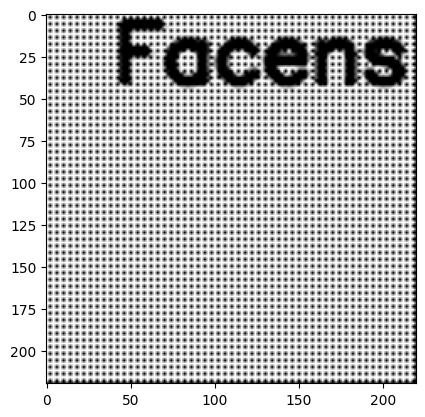

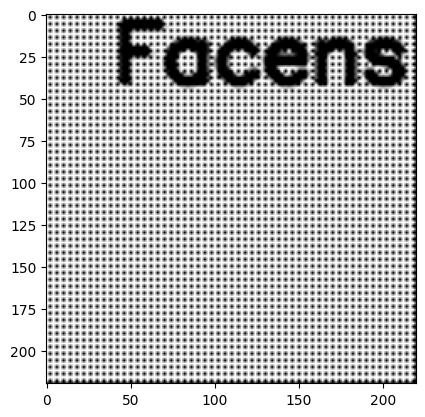

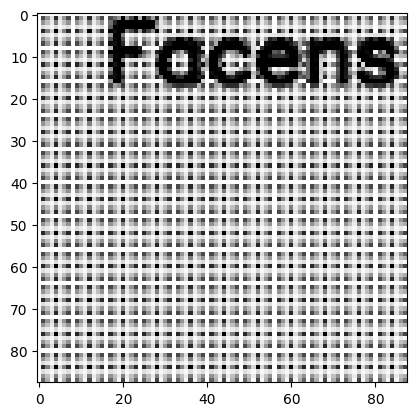

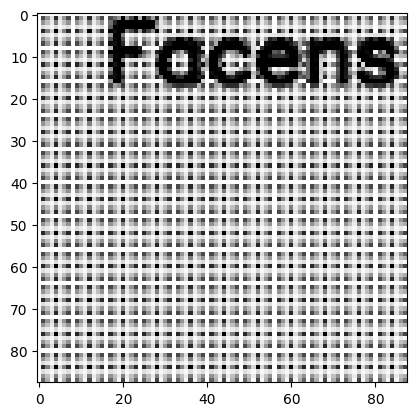

In [18]:
################# COMPLETE O CÓDIGO AQUI  #################

def escala_direta(sx, sy):
  afim = np.array([[sx, 0, 0],
                 [0, sy, 0]], dtype = float)

  tamanho = [int(img.shape[1] * sx), int(img.shape[0] * sy)]
  new_img = cv2.warpAffine(img, M = afim, dsize = tamanho, flags= cv2.INTER_CUBIC)

  return new_img

def escala_inversa(sx, sy):
  afim = np.array([[1/sx, 0, 0],
                 [0, 1/sy, 0]], dtype = float)

  tamanho = [int(img.shape[1] * sx), int(img.shape[0] * sy)]
  new_img = cv2.warpAffine(img, M = afim, dsize = tamanho, flags= cv2.INTER_CUBIC | cv2.WARP_INVERSE_MAP)

  return new_img

sx = 2
sy = 2

img_maior_direta = escala_direta(sx, sy)
img_maior_inversa = escala_direta(sx, sy)

sx = 0.8
sy = 0.8

img_menor_direta = escala_direta(sx, sy)
img_menor_inversa = escala_direta(sx, sy)


##########################################################

# plota a imagem vermelha
plt.imshow(img_maior_direta, 'gray', vmin=0, vmax=255)
plt.show()

# plota a imagem vermelha
plt.imshow(img_maior_inversa, 'gray', vmin=0, vmax=255)
plt.show()

# plota a imagem vermelha
plt.imshow(img_menor_direta, 'gray', vmin=0, vmax=255)
plt.show()

# plota a imagem vermelha
plt.imshow(img_menor_inversa, 'gray', vmin=0, vmax=255)
plt.show()

## Translação

As operações de escala, rotação, translação ou cisalhamento podem ser feitas usando transformação afim.

Para usar a transformação afim, use a função **warpAffine**. Os principais parâmetros são:
- src: imagem
- M: matriz afim. Ela deve ter dimensão 2 x 3. Portanto, não deve ser adicionada a terceira linha da matriz afim tradicional.
- dsize: tamanho da imagem de saída
- flags:  método de interpolação
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica

Use uma operação afim para fazer a translação da imagem feita anteriormente.

A operação afim para translação é:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = %
%
\begin{bmatrix}
1 & 0 & -d_x\\
0 & 1 & -d_y\\
0 & 0 & 1
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} %
$$

No entanto, na biblioteca OpenCV, em vez de $-d_x$ e $-d_y$, você deve usar $d_x$ e $d_y$, pois ela usa por padrão a *transformação afim direta*. Caso você queira usar a mesma matriz afim usada no slide, deve setar adicionar a flag **cv2.WARP_INVERSE_MAP** na função **warpAffine**.

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = %
%
\begin{bmatrix}
1 & 0 & d_x\\
0 & 1 & d_y\\
0 & 0 & 1
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} %
$$

Se você quiser descobrir a matriz afim de uma transforma
Dado que você conheça


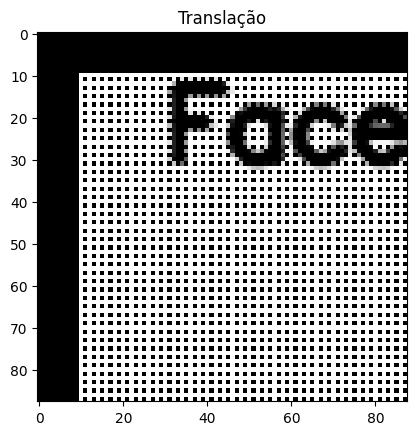

In [19]:
################# COMPLETE O CÓDIGO AQUI  #################

def translacao_inversa(dx, dy):
  afim = np.array([[1, 0, -dx],
                 [0, 1, -dy]], dtype = float)

  tamanho = [int(img.shape[1] * sx), int(img.shape[0] * sy)]
  new_img = cv2.warpAffine(img, M = afim, dsize = tamanho, flags= cv2.INTER_CUBIC | cv2.WARP_INVERSE_MAP)

  return new_img

dx = 10
dy = 10
img_translacao = translacao_inversa(dx, dy)

##########################################################

plt.imshow(img_translacao, 'gray', vmin = 0, vmax = 255)
plt.title('Translação')
plt.show()


## Cisalhamento

Use uma operação afim para fazer o cisalhamento da imagem feita anteriormente.

A operação afim para cisalhamento é:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = %
%
\begin{bmatrix}
1 & -c_v & 0\\
-c_h & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} %
$$

No entanto, na biblioteca OpenCV, em vez de $-c_v$ e $-c_h$, você deve usar $c_v$ e $c_h$. Além disso, deve trocá-los de lugar:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = %
%
\begin{bmatrix}
1 & c_h & 0\\
c_v & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} %
$$


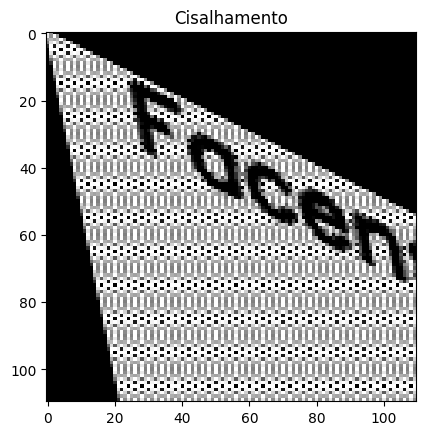

In [21]:
################# COMPLETE O CÓDIGO AQUI  #################

def cisalhamento_inversa(img, ch, cv):
  afim = np.array([[1, -cv, 0],
                 [-ch, 1,  0]], dtype = float)

  tamanho = img.shape
  new_img = cv2.warpAffine(img, M = afim, dsize = tamanho, flags= cv2.INTER_CUBIC | cv2.WARP_INVERSE_MAP)

  return new_img

ch = 0.5
cv = 0.2
img_cisalhamento = cisalhamento_inversa(img,ch, cv)

##########################################################

plt.imshow(img_cisalhamento, 'gray', vmin = 0, vmax = 255)
plt.title('Cisalhamento')
plt.show()


# Rotação

Use uma operação afim para fazer a rotação da imagem feita anteriormente.

A operação afim para rotação é:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = %
%
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} %
$$

- O ângulo $\theta$ controla o quanto a imagem será girada.

    + Em uma rotação positiva, a imagem gira no sentido anti-horário
    + Em uma rotação negativa, a imagem gira no sentido horário.
    
- O valor de $\theta$ é expresso em radianos.

$$\text{ângulo em radianos}=\text{ângulo em graus}×\frac{\pi}{180}$$

Ângulo em radianos:  -0.7853981633974483


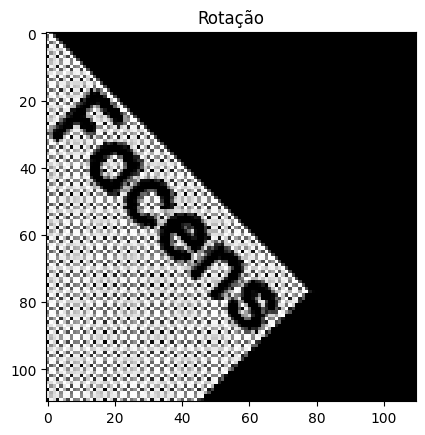

In [22]:
def rotacao_inversa(img, theta):
  afim = np.array([[np.cos(theta), -np.sin(theta), 0],
                 [np.sin(theta), np.cos(theta),  0]], dtype = float)

  tamanho = img.shape
  new_img = cv2.warpAffine(img, M = afim, dsize = tamanho, flags= cv2.INTER_CUBIC | cv2.WARP_INVERSE_MAP)

  return new_img

degree = -45
radian = degree*(np.pi/180)
print("Ângulo em radianos: ", radian)

img_rotacao = rotacao_inversa(img, radian)

plt.imshow(img_rotacao, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação')
plt.show()


É difícil calcular a matriz afim para fazer a rotação em relação a um determinado ponto. Por exemplo, é muito comum que seja necessário fazer rotação em relação ao centro da imagem.

Para obter uma matriz afim para fazer a rotação em relação a um determinado ponto, use a função **getRotationMatrix2D** que possui os seguintes parâmetros:
- center: o ponto que será usado como centro da rotação
- angle: ângulo da rotação (em graus, em vez de radianos)
- scale: fator de escalamento

Depois de obter a matriz afim, use ela como argumento de entrada para a função **warpAffine**.

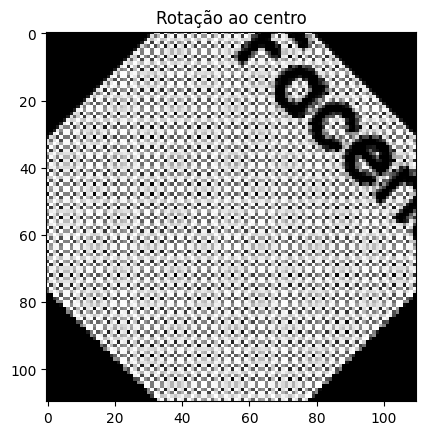

In [23]:
def rotacao_centro(img, angle):

    altura, largura = img.shape
    centro = [int(altura/2), largura/2]

    afim_rotacao = cv2.getRotationMatrix2D(center = centro, angle = angle, scale = 1)

    new_img = cv2.warpAffine(img, M = afim_rotacao, dsize = None, flags= cv2.INTER_CUBIC | cv2.WARP_INVERSE_MAP)

    return new_img

img_rotacao = rotacao_centro(img, 45)

plt.imshow(img_rotacao, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação ao centro')
plt.show()

# Combinando operações

Vamos combinar escala, uma rotação e uma translação. Para combinar estas transformações em uma única matriz afim, multiplicamos as matrizes de transformação na ordem inversa da aplicação desejada. Então, se quisermos primeiro escalar, depois rotacionar, e por fim transladar, a combinação seria:

$$M=\text{translação} \cdot \text{rotação} \cdot \text{escala}$$

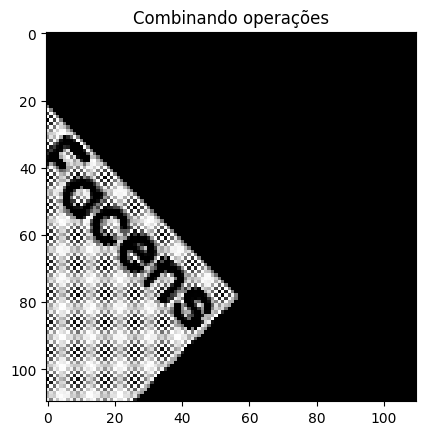

In [25]:
sx = 0.8
sy = 0.8
afim_escala = np.array([[1/sx,0,0],
                        [0,1/sy,0],
                        [0,0,1]], dtype=float)

degree = -45
theta = degree*(np.pi/180)
afim_rotacao = np.array([[np.cos(theta),-np.sin(theta),0],
                         [np.sin(theta),np.cos(theta),0],
                         [0            ,0            ,1]], dtype=float)

dx = 10
dy = 20
afim_translacao = np.array([[1,0,-dx],
                           [0,1,-dy],
                           [0,0,1]], dtype=float)


################# COMPLETE O CÓDIGO AQUI  #################

afim_total = np.dot(afim_rotacao, afim_escala)

afim_total2 = np.dot(afim_translacao, afim_total)

afim_total2 = afim_total2[0:2,:]

new_img = cv2.warpAffine(img, M = afim_total2, dsize = None, flags= cv2.INTER_CUBIC | cv2.WARP_INVERSE_MAP)


##########################################################

plt.imshow(new_img, 'gray', vmin = 0, vmax = 255)
plt.title('Combinando operações')
plt.show()

# Espelhamento

Além das operações principais, uma matriz afim também pode ser usada para outras operações, como o espelhamento.

In [ ]:
def espelhamentoVertical(img):

    ################# COMPLETE O CÓDIGO AQUI  #################











    ##########################################################

    return newImg

def espelhamentoHorizontal(img):

    ################# COMPLETE O CÓDIGO AQUI  #################














    ##########################################################

    return newImg

imgEspVertical = espelhamentoVertical(img)
imgEspHorizontal = espelhamentoHorizontal(img)

plt.imshow(imgEspVertical, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento vertical')
plt.show()

plt.imshow(imgEspHorizontal, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento horizontal')
plt.show()
